# S&P 500 指数 週足 移動メディアン

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

code = 'GSPC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,3992.360107,4048.290039,3928.159912,4045.639893,21459460000,0.0,0.0
2023-03-06 00:00:00-05:00,4055.149902,4078.489990,3846.320068,3861.590088,21422390000,0.0,0.0
2023-03-13 00:00:00-04:00,3835.120117,3964.459961,3808.860107,3916.639893,33867970000,0.0,0.0
2023-03-20 00:00:00-04:00,3917.469971,4039.489990,3909.159912,3970.989990,24375960000,0.0,0.0
2023-03-27 00:00:00-04:00,3982.929932,4110.750000,3951.530029,4109.310059,20849370000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6120.910156,5962.919922,6040.529785,23266090000,0.0,0.0
2025-02-03 00:00:00-05:00,5969.649902,6101.279785,5923.930176,6025.990234,23577640000,0.0,0.0
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-24 00:00:00-05:00,3062.540039,3097.070068,2855.840088,2954.219971,15634280000,0.0,0.0
2020-03-02 00:00:00-05:00,2974.280029,3136.719971,2901.540039,2972.370117,29965390000,0.0,0.0
2020-03-09 00:00:00-04:00,2863.889893,2882.590088,2478.860107,2711.020020,40664410000,0.0,0.0
2020-03-16 00:00:00-04:00,2508.590088,2562.979980,2280.520020,2304.919922,41985050000,0.0,0.0
2020-03-23 00:00:00-04:00,2290.709961,2637.010010,2191.860107,2541.469971,37243200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6120.910156,5962.919922,6040.529785,23266090000,0.0,0.0
2025-02-03 00:00:00-05:00,5969.649902,6101.279785,5923.930176,6025.990234,23577640000,0.0,0.0
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0


In [3]:
period = 13
r_last = len(df0)
r1 = 0
df0['MM13'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm13 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM13'] = mm13
    r1 += 1

In [4]:
period = 26
r_last = len(df0)
r1 = 0
df0['MM26'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm26 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM26'] = mm26
    r1 += 1

In [5]:
period = 52
r_last = len(df0)
r1 = 0
df0['MM52'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm52 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM52'] = mm52
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MM13,MM26,MM52
Date,,,,,,,,,,
2020-02-24 00:00:00-05:00,3062.540039,3097.070068,2855.840088,2954.219971,15634280000,0.0,0.0,NaN,NaN,NaN
2020-03-02 00:00:00-05:00,2974.280029,3136.719971,2901.540039,2972.370117,29965390000,0.0,0.0,NaN,NaN,NaN
2020-03-09 00:00:00-04:00,2863.889893,2882.590088,2478.860107,2711.020020,40664410000,0.0,0.0,NaN,NaN,NaN
2020-03-16 00:00:00-04:00,2508.590088,2562.979980,2280.520020,2304.919922,41985050000,0.0,0.0,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,2290.709961,2637.010010,2191.860107,2541.469971,37243200000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6120.910156,5962.919922,6040.529785,23266090000,0.0,0.0,5970.839844,5821.034912,5484.810059
2025-02-03 00:00:00-05:00,5969.649902,6101.279785,5923.930176,6025.990234,23577640000,0.0,0.0,5995.540039,5845.854980,5529.625000
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0,5996.660156,5867.645020,5560.719971


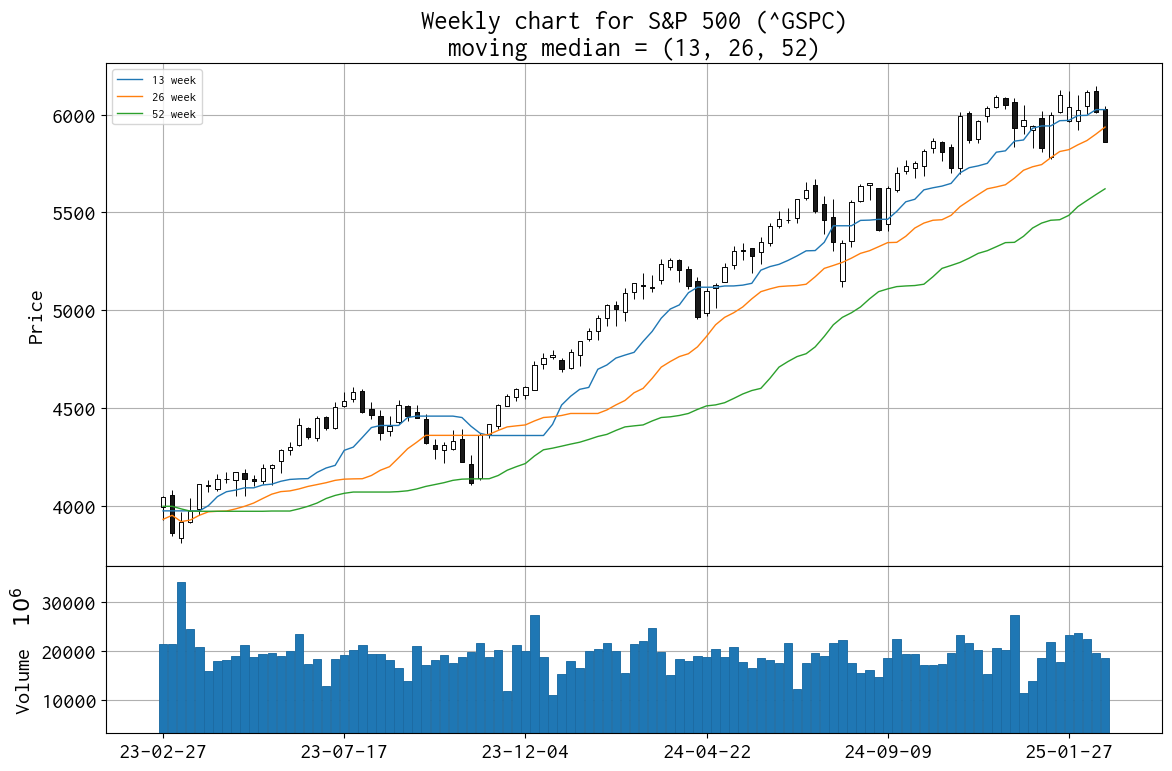

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm13 = df0['MM13']
mm26 = df0['MM26']
mm52 = df0['MM52']
apds  = [
    mpf.make_addplot(mm13[df.index], width=1, label='13 week', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=1, label='26 week', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=1, label='52 week', ax=ax[0]),
]

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_%s.png' % code)
plt.show()

In [7]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5858.779785,5861.569824,18566331000,0.0,0.0


In [8]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00-05:00    6013.129883
2025-02-24 00:00:00-05:00    5861.569824
Name: Close, dtype: float64

In [9]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00-05:00           NaN
2025-02-24 00:00:00-05:00   -151.560059
Name: Close, dtype: float64

In [10]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00-05:00   -165.120117
dtype: float64

In [11]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00-05:00    5986.066932
2025-02-03 00:00:00-05:00    5988.409255
2025-02-10 00:00:00-05:00    6007.179237
2025-02-17 00:00:00-05:00    6010.547701
2025-02-24 00:00:00-05:00    5997.408466
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00-05:00    5824.736122
2025-02-03 00:00:00-05:00    5850.960355
2025-02-10 00:00:00-05:00    5872.513428
2025-02-17 00:00:00-05:00    5887.071890
2025-02-24 00:00:00-05:00    5895.270733
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    5543.429030
2025-02-03 00:00:00-05:00    5562.647883
2025-02-10 00:00:00-05:00    5583.975962
2025-02-17 00:00:00-05:00    5601.751540
2025-02-24 00:00:00-05:00    5615.684035
Name: Close, dtype: float64